In [361]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob


In [362]:
group_files = sorted(glob.glob ("./Comp Vision Project/Group JPEGs_Uncropped/IMG_*.jpg"))

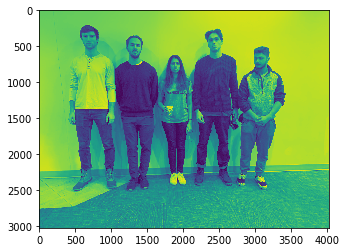

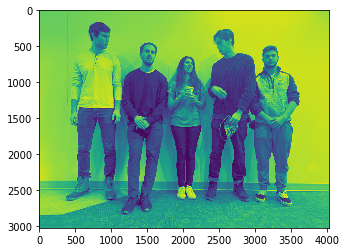

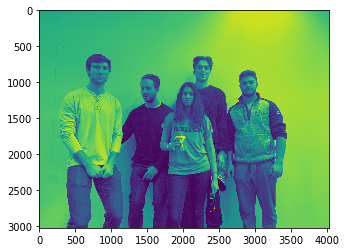

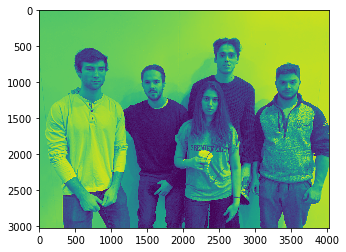

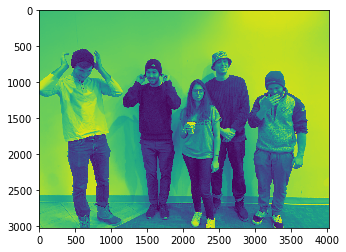

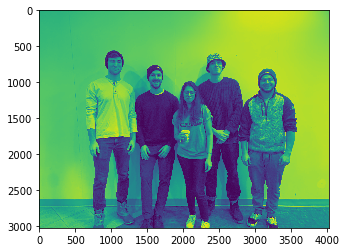

In [363]:
group_pics=[]
for myFile in group_files:
    pic = cv2.imread(myFile)
    pic =cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
    group_pics.append(pic)
    plt.imshow(pic)
    plt.show()
    

In [365]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = []
for i, img in enumerate(group_pics):
    faces.append(
        faceCascade.detectMultiScale(img, scaleFactor=1, minNeighbors=6, 
                                     minSize=(100, 100), flags = cv2.CASCADE_SCALE_IMAGE)
    )
print("Found {} faces! for image_gray[{}]".format(len(faces[-1]), i))

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1698: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


# BONUS

In [292]:
quentin_train_ROI = [[98, 70, 51, 51], [100, 71, 36, 43], [90, 75, 35, 50], [122, 73, 30, 48], [125, 75, 35, 50], [98, 60, 67, 75], [80, 62, 55, 73], [80, 55, 47, 78], [100, 75, 50, 68], [98, 62, 51, 90], [55, 70, 120, 133], [80, 72, 85, 125], [70, 90, 80, 120], [60, 67, 90, 127], [97, 54, 88, 156]]
connor_train_ROI = [[112, 94, 46, 46], [103, 98, 45, 45], [103, 103, 38, 47], [109, 96, 39, 49], [115, 104, 30, 47], [92, 80, 60, 65], [100, 77, 45, 67], [70, 83, 51, 67], [100, 80, 50, 70], [106, 81, 44, 69], [80, 60, 105, 122], [70, 63, 105, 125], [50, 80, 80, 120], [98, 75, 80, 118], [112, 59, 75, 131]]
bogdan_train_ROI = [[100, 105, 57, 57], [120, 111, 27, 42], [128, 106, 35, 44], [95, 102, 38, 46], [89, 105, 36, 50], [95, 96, 62, 62], [124, 104, 47, 65], [131, 99, 52, 67], [91, 87, 65, 80], [76, 91, 60, 75], [68, 72, 133, 140], [89, 80, 100, 125], [107, 78, 80, 130], [45, 84, 115, 120], [60, 89, 102, 110]]
julien_train_ROI = [[94, 79, 51, 51], [112, 89, 37, 43], [110, 90, 35, 60], [120, 85, 40, 50], [110, 90, 45, 50], [95, 87, 59, 70], [108, 80, 50, 75], [100, 77, 50, 77], [95, 75, 50, 75], [110, 75, 50, 75], [75, 75, 95, 120], [90, 75, 90, 125], [75, 75, 100, 125], [77, 56, 127, 140], [100, 75, 80, 125]]
sarah_train_ROI = [[113, 103, 29, 29], [107, 95, 30, 30], [114, 95, 29, 29], [97, 101, 29, 29], [105, 104, 20, 32], [96, 81, 54, 54], [104, 84, 51, 51], [116, 90, 38, 44], [81, 88, 50, 50], [83, 90, 28, 40], [68, 83, 89, 89], [77, 80, 84, 84], [93, 91, 70, 80], [74, 94, 77, 77], [58, 86, 70, 102]] 



In [293]:
single_imgs = sorted(glob.glob ("./Comp Vision Project/Cropped JPEGs/Train_Images/IMG_*.jpg"))
#print(single_imgs)
faces = []
ROIS = []
ROIS.append(quentin_train_ROI)
ROIS.append(connor_train_ROI)
ROIS.append(bogdan_train_ROI)
ROIS.append(julien_train_ROI)
ROIS.append(sarah_train_ROI)
ROIS = np.asarray(ROIS)

In [294]:
index  = -1
pics = []
for i, img in enumerate(single_imgs):
    pic = cv2.imread(img)
    pic =cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
    pic = cv2.resize(pic,(256,256))
    pics.append(pic)
#     plt.imshow(pic,cmap='gray')
#     plt.show()


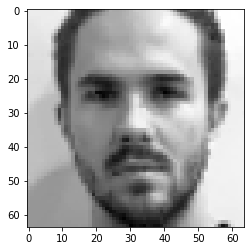

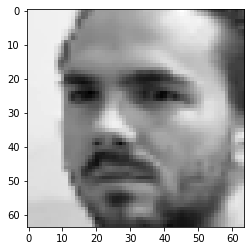

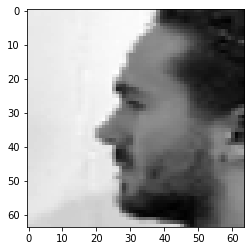

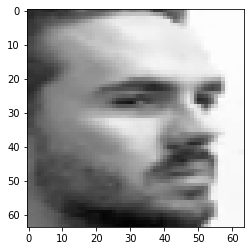

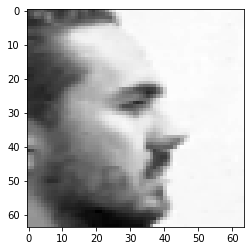

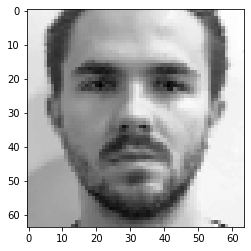

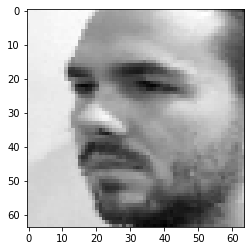

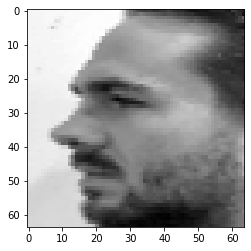

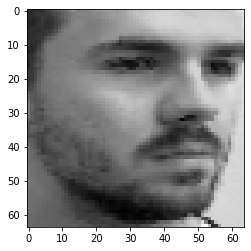

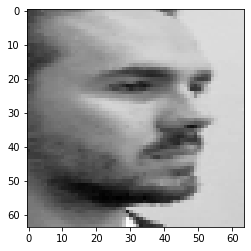

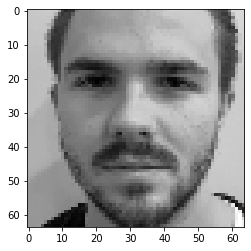

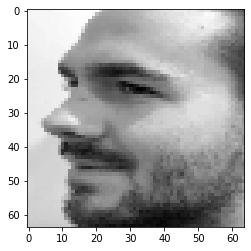

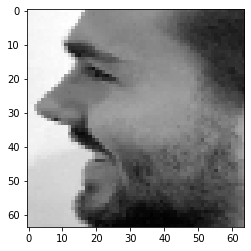

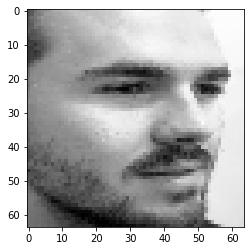

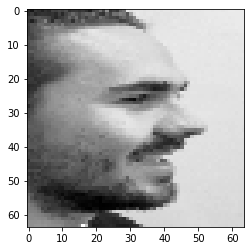

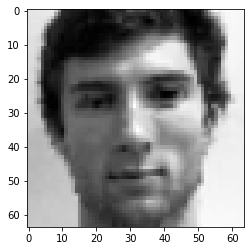

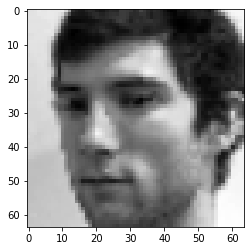

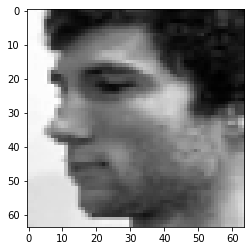

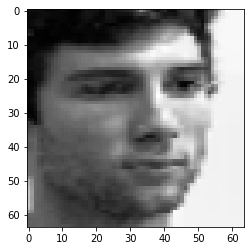

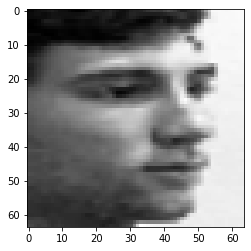

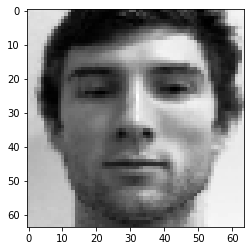

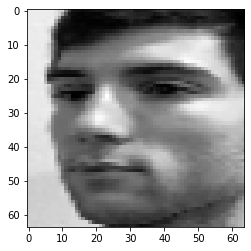

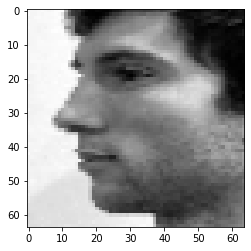

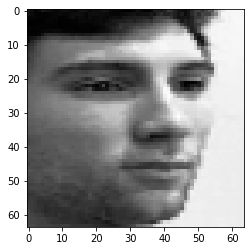

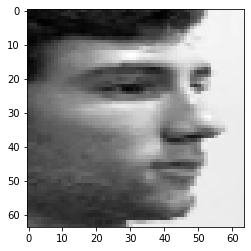

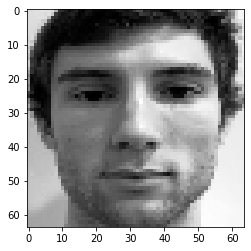

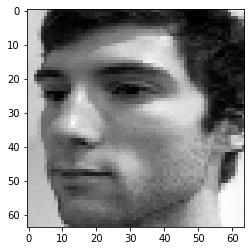

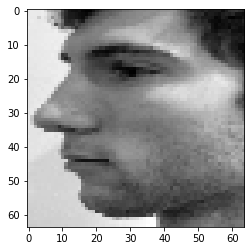

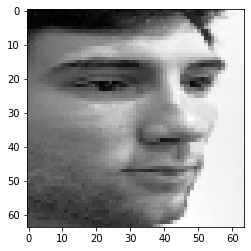

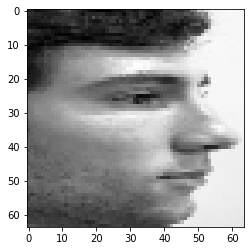

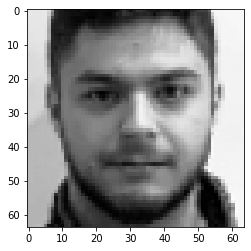

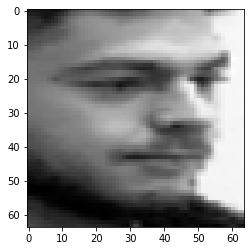

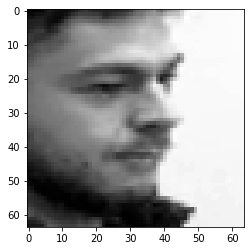

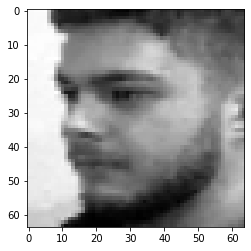

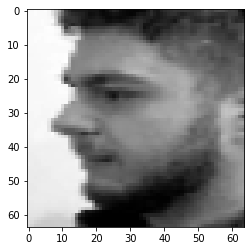

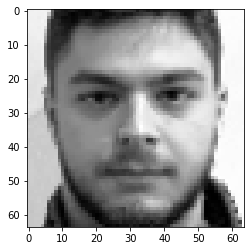

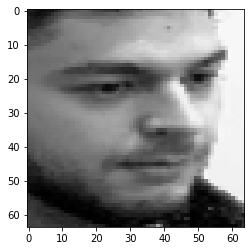

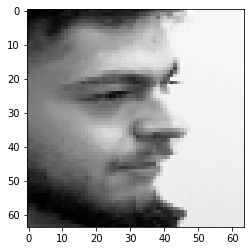

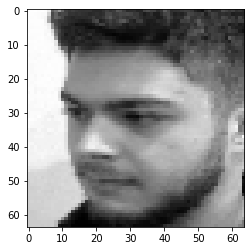

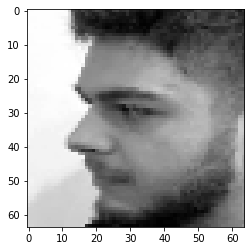

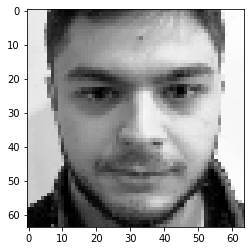

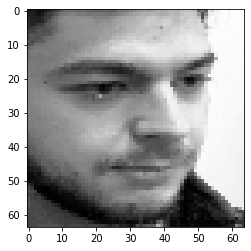

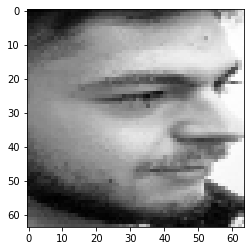

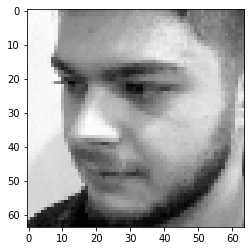

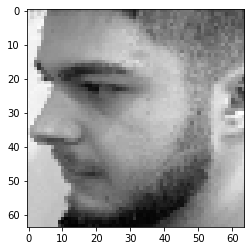

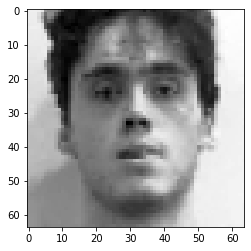

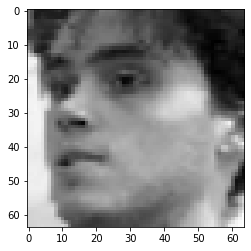

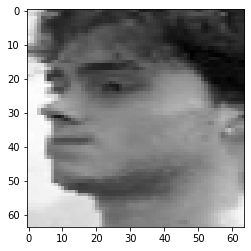

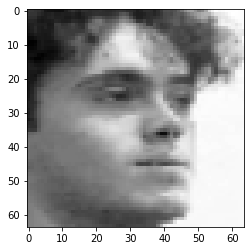

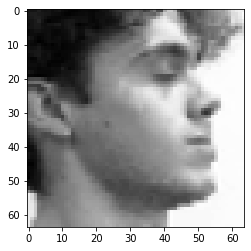

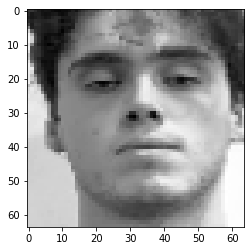

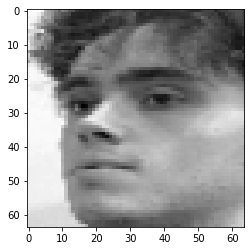

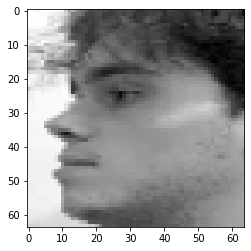

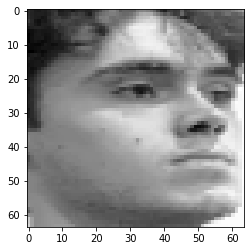

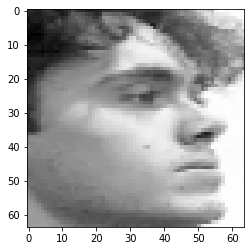

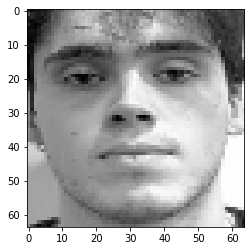

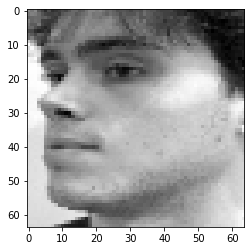

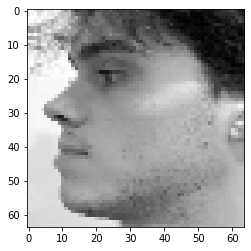

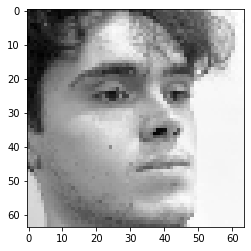

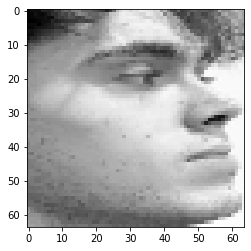

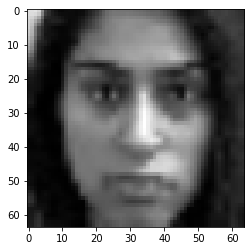

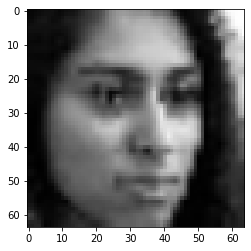

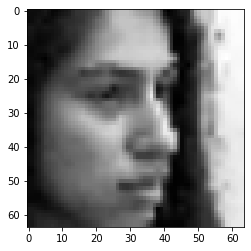

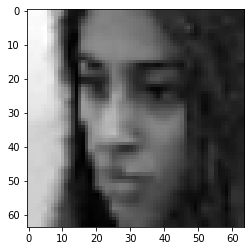

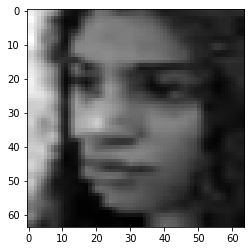

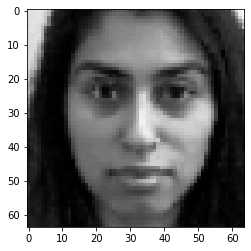

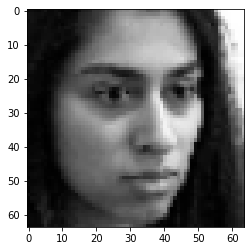

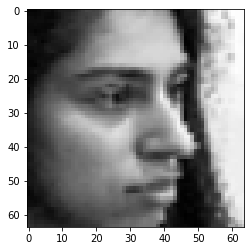

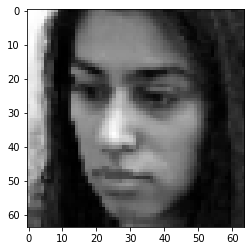

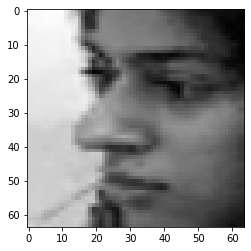

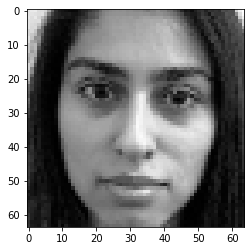

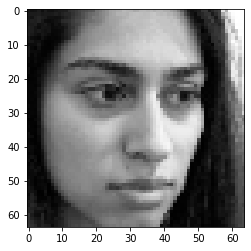

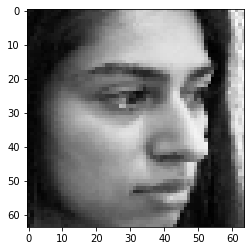

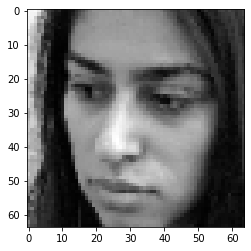

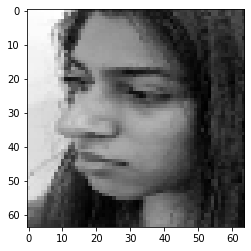

In [295]:
cropped = []
for i, pic in enumerate(pics):
    dims = ROIS[int(i/15),i%15]
    cropped.append(cv2.resize(pic[dims[1]:dims[1]+dims[3],dims[0]:dims[0]+dims[2]],(64,64)))
    #print(dims)
    plt.imshow(cropped[i],cmap='gray')
    plt.show()

In [296]:
cell_size = (4, 4)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 7  # number of orientation bins

# create HoG Object
hog = cv2.HOGDescriptor(_winSize=(64 // cell_size[1] * cell_size[1],
                                  64 // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (64 // cell_size[0], 64 // cell_size[1])
#create and populate feature array
feats_arr=[]
for img in cropped:
    hog_feats = hog.compute(img) \
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[1], block_size[0], nbins) \
               .transpose((1, 0, 3, 2, 4))  # index blocks by rows first
    feats_arr.append(hog_feats)
#calculate mean feature map
feats_arr = np.asarray(feats_arr)
mean_feats=sum(feats_arr)/len(feats_arr)


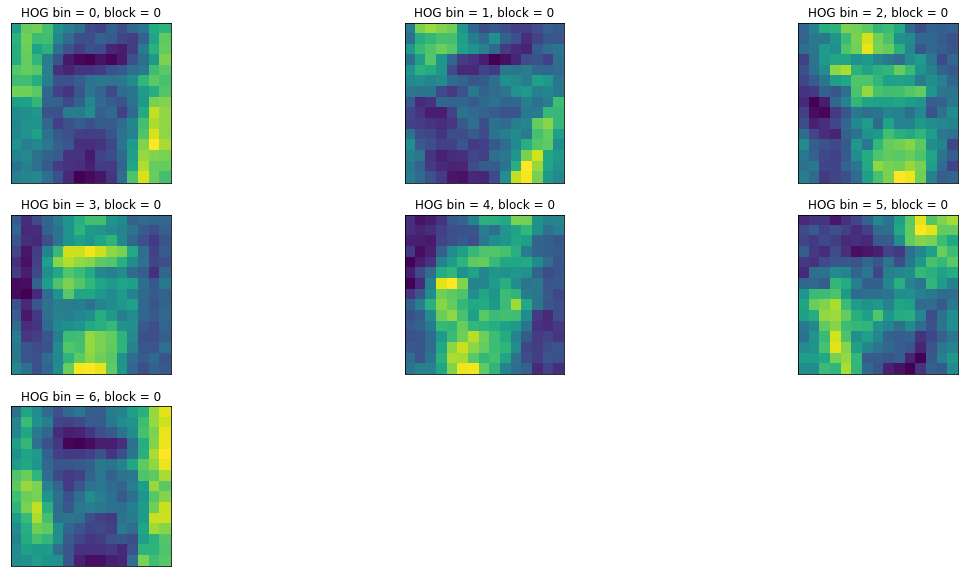

In [298]:
#print mean feature map
plt.figure(figsize = (20,10))
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.pcolor(mean_feats[:, :, 0,0,i])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin = "+str(i)+", block = 0"), plt.xticks([]), plt.yticks([])
plt.show()

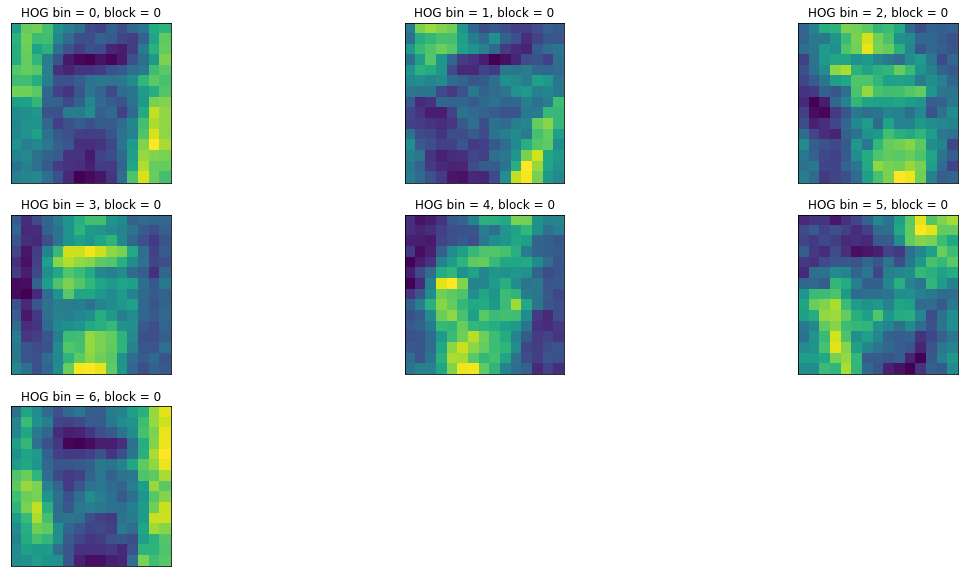

In [304]:
#repeat previous steps with inverted images
#populate feature array
invfeats_arr=[]
for img in cropped:
    hog_feats = hog.compute( cv2.flip( img, 1 )) \
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[1], block_size[0], nbins) \
               .transpose((1, 0, 3, 2, 4))  # index blocks by rows first
    invfeats_arr.append(hog_feats)
invfeats_arr = np.asarray(feats_arr)
#calculate mean feature map
invmean_feats=sum(invfeats_arr)/len(feats_arr)
plt.figure(figsize = (20,10))
#print features maps
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.pcolor(invmean_feats[:, :, 0,0,i])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG bin = "+str(i)+", block = 0"), plt.xticks([]), plt.yticks([])
plt.show()

In [305]:
def extract_windows(img,step,window_h,window_w):
    windows = []
    coord = []
    for x in range(0,img.shape[0]-window_h,step):
        for y in range(0,img.shape[1]-window_w,step):
            windows.append(np.array(img[x:x+window_h,y:y+window_w]))
            coord.append((x,y))
    return windows , coord

In [306]:
#extract windows
window_h,window_w = 64,64
step=20
windows,coords = extract_windows(group_pics[0],step,window_h,window_w)
windows = np.asarray(windows)
#resize windows (and print)
for window in windows: 
#     plt.imshow(window,cmap='gray')
#     plt.show()
    window=np.resize(window,(64,64))
  

In [307]:
#compute hog features and store ina rray
test_feats_arr = []
for window in windows:
    hog_feats = hog.compute(window) \
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[1], block_size[0], nbins) \
               .transpose((1, 0, 3, 2, 4))  # index blocks by rows first
    test_feats_arr.append(hog_feats)
test_feats_arr = np.asarray(test_feats_arr)

In [352]:
dists = []
for i,feats in enumerate(test_feats_arr):
    dist = cv2.norm(mean_feats - feats)
    dists.append(dist)
dists=np.asarray(dists)
print(dists.shape)
display= group_pics[0].copy()
display = np.asarray(display)
lowthresh = 11
highthresh = 11.1
thresh_windows = [windows[i] for i, dist in enumerate(dists) if dist < highthresh and dist > lowthresh]
thresh_coords =  [coords[i] for i, dist in enumerate(dists) if dist < highthresh and dist > lowthresh]
thresh_coords = np.asarray(thresh_coords)
thresh_feats = [test_feats_arr[i] for i , dist in enumerate(dists) if  dist < highthresh and dist > lowthresh]  
thresh_feats = np.asarray(thresh_feats)
for i, coord in enumerate(thresh_coords):
   
    x=coord[0]
    y=coord[1]
    cv2.rectangle(display, (y,x),(y+64,x+64),(0,255,0), 3)
  


(999,)


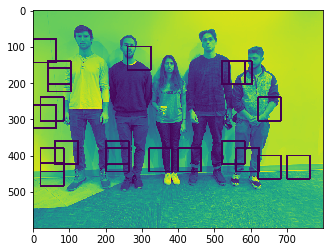

In [353]:
plt.imshow(display)
plt.show()